<a href="https://colab.research.google.com/github/nastya146/data-analyse/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**
...

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [ ]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))

x_train, x_test = train_test_split(X, test_size = 0.2)
x_train = torch.tensor(x_train, dtype=torch.float, requires_grad = True)
y_train = torch.tensor(torch.sin(x_train), dtype=torch.float, requires_grad = True)
x_test = torch.tensor(x_test, dtype=torch.float, requires_grad = True)
y_test = torch.tensor(torch.sin(x_test), dtype=torch.float, requires_grad = True)


X = X.reshape(sample_size,)
y = np.sin(X)
assert y.shape == (sample_size,)

<ipython-input-3-5b3eb14c757b>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(torch.sin(x_train), dtype=torch.float, requires_grad = True)
<ipython-input-3-5b3eb14c757b>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(torch.sin(x_test), dtype=torch.float, requires_grad = True)


Обучите нейросеть на этих данных. Используйте код с занятия.

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

In [ ]:
def train(num_iter, model, x_train, y_train):
  loss = np.inf
  i = 0
  while i < num_iter:

      # Forward pass: предсказание модели по данным x_train
      y_pred = model(x_train)

      # Вычисление оптимизируемой функции (MSE) по предсказаниям
      loss = optim_func(y_pred, y_train)

      # Bakcward pass: вычисление градиентов оптимизируемой функции
      # по всем параметрам модели
      loss.backward()

      # Оптимизация: обновление параметров по формулам соответствующего
      # метода оптимизации, используются вычисленные ранее градиенты
      optimizer.step()

      # Зануление градиентов
      optimizer.zero_grad()

      i += 1

In [ ]:
train(1000, model, x_train, y_train)

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

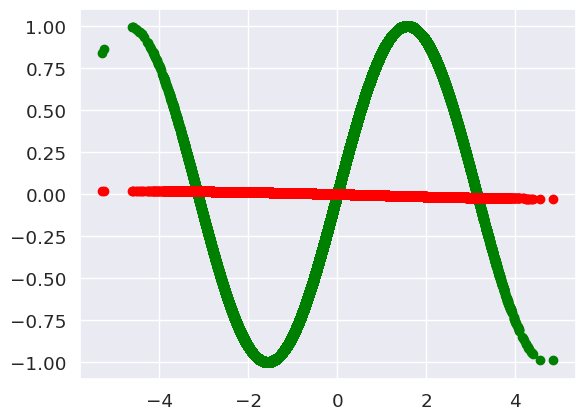

In [ ]:
y_pred_train_torch = model(x_train).detach().numpy()

plt.scatter(x_train.detach().numpy(), y_train.detach().numpy(), color = 'green')
plt.scatter(x_train.detach().numpy(), y_pred_train_torch, color = 'red')
plt.show()

In [ ]:
y_test_pred = model(x_test)
mse = mean_squared_error(y_test.detach().numpy(), y_test_pred.detach().numpy())
print("MSE: {}".format(mse))

MSE: 0.009323266334831715


**Вывод:**
Ошибки на тестовой и тренировочной выборке примерно равны, то есть можель не переобучилась
Видно что нейронная сеть, быстро научилась аппроксимировать линейную часть, затем начинает медленно приближать левый и правый конец, но в связи с небольшим количеством нейронов и слоев это происходит очень медленно


---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [ ]:
x_np_train = x_train.detach().numpy()
y_np_train =  y_train.detach().numpy()
x_np_test = x_test.detach().numpy()
y_np_test =  y_test.detach().numpy()

In [ ]:
def Sigmoid(x) :
  return 1 / (1 + np.exp(x))

def Batches(X, Y, batch_size) :
   perm = np.random.permutation(len(X))
   count = X.shape[0] // batch_size
   i = 1
   x_batch = []
   y_batch = []
   while i < count:
      idx = perm[(i - 1) * batch_size : i * batch_size]
      x_batch.append(X[idx])
      y_batch.append(Y[idx])
      i += 1
   idx = perm[(i - 1) * batch_size :]
   x_batch.append(X[idx])
   y_batch.append(Y[idx])
   return x_batch, y_batch

class NN:
    def __init__(self, lr=0.01, num_epoch = 1000):
        self.lr = lr
        self.num_epoch = num_epoch
        self.epoch = 0
        self.W1 = None
        self.b1 = None
        self.W2 = None
        self.b2 = None

    def predict(self, X):
        return Sigmoid(X @ self.W1 + self.b1) @ self.W2 + self.b2

    def fit(self, X, Y):
        print(self.W1 is None)
        if self.W1 is None:
          self.W1 = np.random.randn(1, 2)
          self.W2 = np.random.randn(2, 1)
          self.b1 = np.random.randn(2)
          self.b2 = np.random.randn(1)
        batch_size = 256
        for i in range(self.num_epoch):
            print(i)
            batches = np.array(Batches(X, Y, batch_size))
            for  j in range(batches.shape[1]):
                x_batch = batches[0, j]
                y_batch = batches[1, j]
                y_pred = self.predict(x_batch)

                loss = mean_squared_error(y_batch, y_pred)

                grad_b1 = 2 * (((y_pred - y_batch) * x_batch * (Sigmoid(x_batch) ** 2 + 2 * np.exp(-x_batch))).mean() * self.W2).reshape(2,)
                grad_W1 = 2 * ((y_pred - y_batch) * (Sigmoid(x_batch) ** 2 + 2 * np.exp(x_batch))).mean() * self.W2.T
                grad_W2 = 2 * ((y_pred - y_batch) * Sigmoid(x_batch @ self.W1 + self.b1)).mean(axis = 0).reshape(2, 1)
                grad_b2 = 2 * (y_pred - y_batch).mean()

                self.b1 = self.b1 - self.lr * grad_b1
                self.W1 = self.W1 - self.lr * grad_W1
                self.b2 = self.b2 - self.lr * grad_b2
                self.W2 = self.W2 - self.lr * grad_W2

        print("на эпохе {} ошибка: {}".format(i, loss))
        self.epoch += i
        return self

mod = NN(num_epoch = 500)

In [ ]:
mod.fit(x_np_train, y_np_train)

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [ ]:
from sklearn.linear_model import LinearRegression

# Создание и обучение модели линейной регрессии
model_linreg = LinearRegression()
model_linreg.fit(x_np_train, y_np_train)

# Предсказание
y_pred_train_linreg = model_linreg.predict(x_np_train)
y_pred_train_my_nn = mod.predict(x_np_train)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

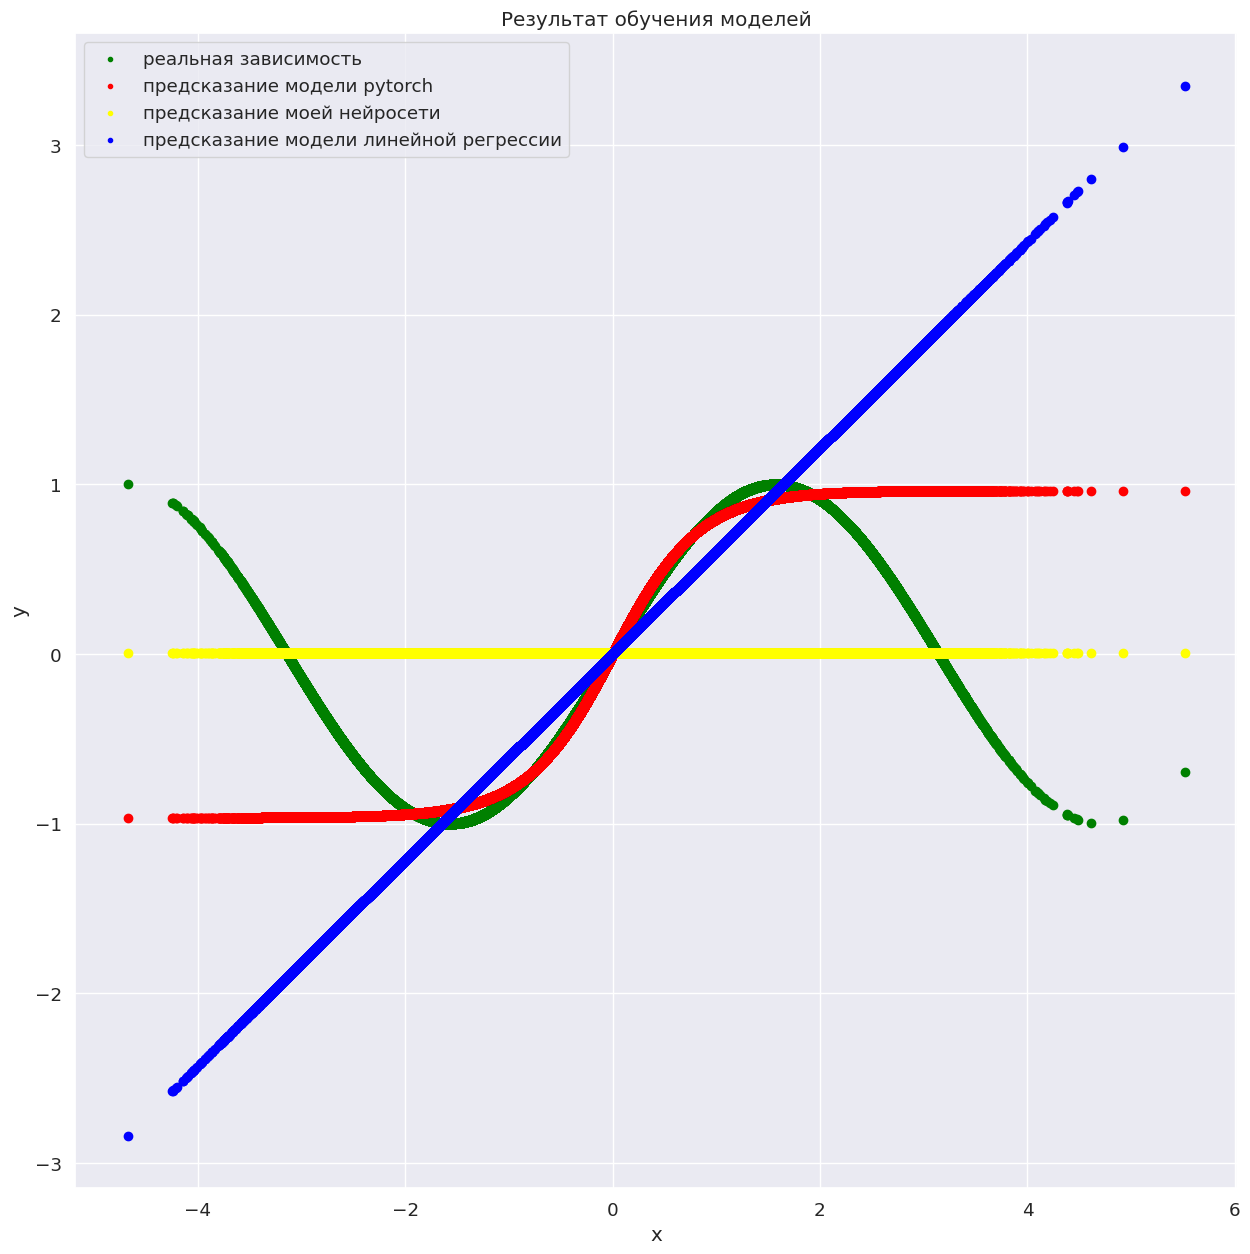

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(x_np_train, y_np_train, color = 'green', label = 'реальная зависимость')
plt.scatter(x_np_train, y_pred_train_torch, color = 'red', label = 'предсказание модели pytorch')
plt.scatter(x_np_train, y_pred_train_my_nn, color = 'yellow', label = 'предсказание моей нейросети')
plt.scatter(x_np_train, y_pred_train_linreg, color = 'blue', label = 'предсказание модели линейной регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(markerscale = 0.5)
plt.title('Результат обучения моделей')
plt.show()

In [ ]:
y_pred_test_my_nn = mod.predict(x_np_test)
y_pred_test_linreg = model_linreg.predict(x_np_test)

print("MSE для предсказания по тестовой выборке для модели NN: {}, линейной регрессии: {}".format(mean_squared_error(y_pred_test_my_nn, y_np_test), mean_squared_error(y_pred_test_linreg, y_np_test)))

MSE для предсказания по тестовой выборке для модели NN: 0.43364629572386065, линейной регрессии: 0.06399841606616974


Повторите вычисления для другой нелинейной функции $y(x)$.

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))

x_train, x_test = train_test_split(X, test_size = 0.2)
x_train = torch.tensor(x_train, dtype=torch.float, requires_grad = True)
y_train = torch.tensor(torch.abs(torch.sin(x_train)), dtype=torch.float, requires_grad = True)
x_test = torch.tensor(x_test, dtype=torch.float, requires_grad = True)
y_test = torch.tensor(torch.abs(torch.sin(x_test)), dtype=torch.float, requires_grad = True)

x_np_train = x_train.detach().numpy()
y_np_train =  y_train.detach().numpy()
x_np_test = x_test.detach().numpy()
y_np_test =  y_test.detach().numpy()

<ipython-input-163-99b8bbefe4bd>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(torch.abs(torch.sin(x_train)), dtype=torch.float, requires_grad = True)
<ipython-input-163-99b8bbefe4bd>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(torch.abs(torch.sin(x_test)), dtype=torch.float, requires_grad = True)


In [ ]:
train(1000, model, x_train, y_train)
y_pred_train_torch = model(x_train)
y_pred_test_torch = model(x_test)

model_linreg = LinearRegression()
model_linreg.fit(x_np_train, y_np_train)
y_pred_train_linreg = model_linreg.predict(x_np_train)
y_pred_test_linreg = model_linreg.predict(x_np_test)


In [ ]:
model_nn = NN(num_epoch = 100)
model_nn.fit(x_np_train, y_np_train)
y_pred_train_my_nn = model_nn.predict(x_np_train)
y_pred_test_my_nn = model_nn.predict(x_np_test)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


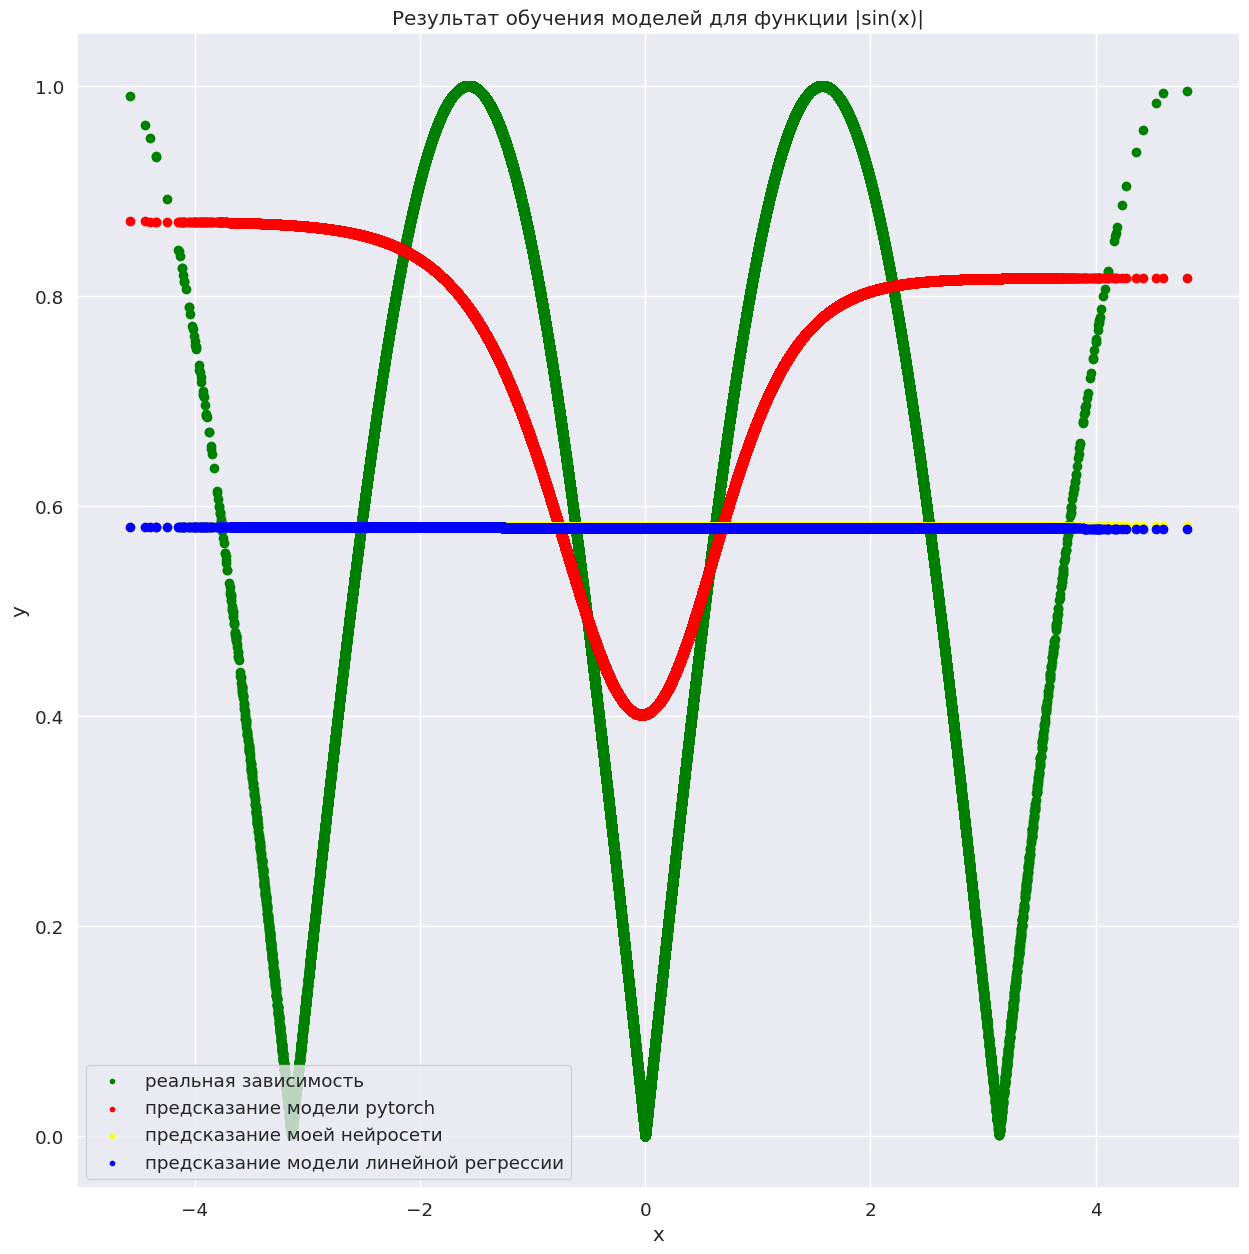

MSE: torch модель - 0.03659827262163162, my_nn - 0.09690642598358079, линейная регрессия - 0.09690696001052856


In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(x_np_train, y_np_train, color = 'green', label = 'реальная зависимость')
plt.scatter(x_np_train, y_pred_train_torch.detach().numpy(), color = 'red', label = 'предсказание модели pytorch')
plt.scatter(x_np_train, y_pred_train_my_nn, color = 'yellow', label = 'предсказание моей нейросети')
plt.scatter(x_np_train, y_pred_train_linreg, color = 'blue', label = 'предсказание модели линейной регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(markerscale = 0.5)
plt.title('Результат обучения моделей для функции |sin(x)|')
plt.show()

mse_torch = mean_squared_error(y_pred_test_torch.detach().numpy(), y_np_test)
mse_linreg = mean_squared_error(y_pred_test_linreg, y_np_test)
mse_my_nn = mean_squared_error(y_pred_test_my_nn, y_np_test)

print("MSE: torch модель - {}, my_nn - {}, линейная регрессия - {}".format(mse_torch, mse_my_nn, mse_linreg))

**Вывод:**
Аналогично прошлым моделям Pytorch обучается быстрее и точнее, в то время как наша нейронная сеть работает долго и ее результат на небольшом количесвте эпох не отличается от результата обчения линейной регрессии